In [72]:
import pickle
import numpy as np

In [73]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [74]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [75]:
print(type(test_data),type(train_data))

<class 'list'> <class 'list'>


In [76]:
print(len(test_data), len(train_data))

1000 10000


In [77]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [78]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [79]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [80]:
train_data[0][2]

'no'

# Setting up Vocabulary of All Words

In [81]:
vocab = set()

In [82]:
all_data = test_data + train_data

In [83]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [84]:
type(all_data)

list

In [85]:
vocab.add('no')
vocab.add('yes')

In [86]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [87]:
vocab_len = len(vocab) + 1 
vocab_len

38

In [88]:
max_story_len = max([len(data[0]) for data in all_data])

In [89]:
max_story_len

156

In [90]:
max_question_len = max([len(data[1]) for data in all_data])

In [91]:
max_question_len

6

# Vectorizing the Data

In [92]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [93]:
vocab_size = len(vocab) + 1

In [94]:
from tensorflow import keras
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [95]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [96]:
tokenizer.word_index

{'went': 1,
 'daniel': 2,
 'journeyed': 3,
 'up': 4,
 'no': 5,
 'travelled': 6,
 'grabbed': 7,
 'the': 8,
 'dropped': 9,
 'is': 10,
 'down': 11,
 'left': 12,
 'kitchen': 13,
 'got': 14,
 'in': 15,
 'yes': 16,
 'picked': 17,
 'to': 18,
 'bedroom': 19,
 'moved': 20,
 'football': 21,
 'sandra': 22,
 'apple': 23,
 'hallway': 24,
 'took': 25,
 'mary': 26,
 '.': 27,
 'put': 28,
 'john': 29,
 '?': 30,
 'office': 31,
 'there': 32,
 'discarded': 33,
 'bathroom': 34,
 'back': 35,
 'garden': 36,
 'milk': 37}

In [97]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [98]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [99]:
len(train_story_text)

10000

In [100]:
len(train_story_seq)

10000

# Vectorization Function

In [101]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [102]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [103]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [104]:
inputs_test

array([[ 0,  0,  0, ...,  8, 19, 27],
       [ 0,  0,  0, ...,  8, 36, 27],
       [ 0,  0,  0, ...,  8, 36, 27],
       ...,
       [ 0,  0,  0, ...,  8, 23, 27],
       [ 0,  0,  0, ...,  8, 36, 27],
       [ 0,  0,  0, ..., 23, 32, 27]])

In [105]:
queries_test

array([[10, 29, 15,  8, 13, 30],
       [10, 29, 15,  8, 13, 30],
       [10, 29, 15,  8, 36, 30],
       ...,
       [10, 26, 15,  8, 19, 30],
       [10, 22, 15,  8, 36, 30],
       [10, 26, 15,  8, 36, 30]])

In [106]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [108]:
tokenizer.word_index['yes']

16

In [109]:
tokenizer.word_index['no']

5

# Model creation

In [110]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [111]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

# Encoders

In [112]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [113]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [114]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [115]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [116]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [117]:
response = add([match, input_encoded_c])  
response = Permute((2, 1))(response)  

In [118]:
answer = concatenate([response, question_encoded])

In [119]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [120]:
answer = LSTM(32)(answer)

In [121]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [122]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [123]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_5 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                            

In [124]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=16,epochs=70,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/70
625/625 [==============================] - 8s 10ms/step - loss: 0.8071 - accuracy: 0.4984 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 2/70
625/625 [==============================] - 7s 11ms/step - loss: 0.6993 - accuracy: 0.4948 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/70
625/625 [==============================] - 7s 11ms/step - loss: 0.6959 - accuracy: 0.5073 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 4/70
625/625 [==============================] - 8s 12ms/step - loss: 0.6960 - accuracy: 0.4965 - val_loss: 0.6957 - val_accuracy: 0.4970
Epoch 5/70
625/625 [==============================] - 7s 11ms/step - loss: 0.6958 - accuracy: 0.4967 - val_loss: 0.6945 - val_accuracy: 0.4970
Epoch 6/70
625/625 [==============================] - 6s 9ms/step - loss: 0.6969 - accuracy: 0.4847 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/70
625/625 [==============================] - 7s 11ms/step - loss: 0.6953 - accuracy: 0.5044 - val_loss: 0.6976 - val_accuracy: 0.4970


Epoch 58/70
625/625 [==============================] - 8s 12ms/step - loss: 0.3931 - accuracy: 0.8300 - val_loss: 0.4043 - val_accuracy: 0.8180
Epoch 59/70
625/625 [==============================] - 7s 12ms/step - loss: 0.3864 - accuracy: 0.8369 - val_loss: 0.3922 - val_accuracy: 0.8380
Epoch 60/70
625/625 [==============================] - 6s 9ms/step - loss: 0.3812 - accuracy: 0.8402 - val_loss: 0.3957 - val_accuracy: 0.8360
Epoch 61/70
625/625 [==============================] - 6s 9ms/step - loss: 0.3734 - accuracy: 0.8400 - val_loss: 0.4096 - val_accuracy: 0.8190
Epoch 62/70
625/625 [==============================] - 6s 9ms/step - loss: 0.3676 - accuracy: 0.8443 - val_loss: 0.4071 - val_accuracy: 0.8250
Epoch 63/70
625/625 [==============================] - 7s 11ms/step - loss: 0.3712 - accuracy: 0.8432 - val_loss: 0.3874 - val_accuracy: 0.8300
Epoch 64/70
625/625 [==============================] - 8s 12ms/step - loss: 0.3701 - accuracy: 0.8441 - val_loss: 0.4156 - val_accuracy: 0.

The accuracy of the model can be further increased by training for more epochs. It will random and in my case you'll see that the accuracy has started increasing dramatically after 30 epochs.

# Save the model

In [125]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

# Evaluate the model

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


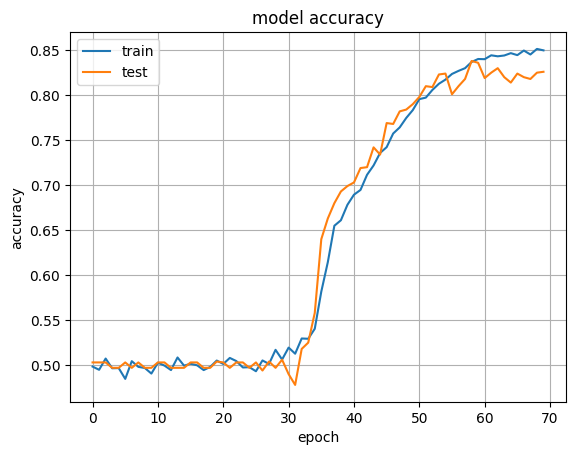

In [127]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

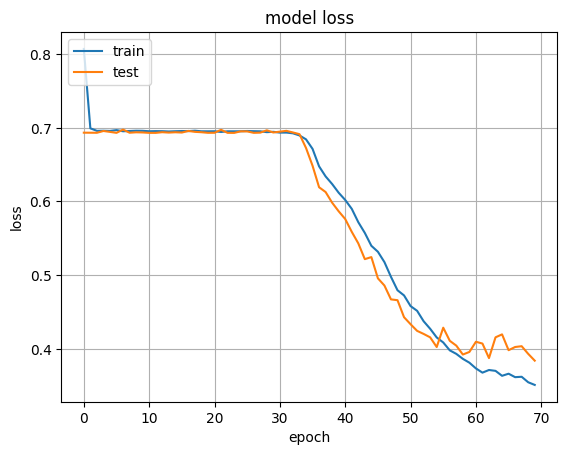

In [128]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [129]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 5ms/step


In [130]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [131]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [132]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [133]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [134]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99746144


# Writing our own dialogs & questions(stories)

In [135]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [136]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [137]:
my_question = "Is the football in the garden ?"

In [138]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [139]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [140]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [141]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 30ms/step


In [142]:

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9508801
